# Project : News Genre Prediction From The Headline

____________________________

## Step 1: Import Required Libraries

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('TOI_News.csv')
df.head()

,Headline,Genre
0,Here's why Nitesh selected Ranbir for 'Ramayana',Entertainment
1,Tanushree Dutta criticises Hema Committee report,Entertainment
2,Michael C. Hall returns to the ‘Dexter’ universe,Entertainment
3,Behind the scenes moments with Bollywood stars,Entertainment
4,Confirmed! JL files for divorce from Ben Affleck,Entertainment


In [3]:
df['Genre'].value_counts()

Genre
Health           318
Business         274
Politics         142
Sports           132
Entertainment     75
Education         69
Religion          57
Technology        44
Life-Style        41
Name: count, dtype: int64

In [4]:
df.isnull().sum()

Headline    35
Genre        0
dtype: int64

In [5]:
df = df.dropna(subset='Headline')

In [6]:
df.isnull().sum()

Headline    0
Genre       0
dtype: int64

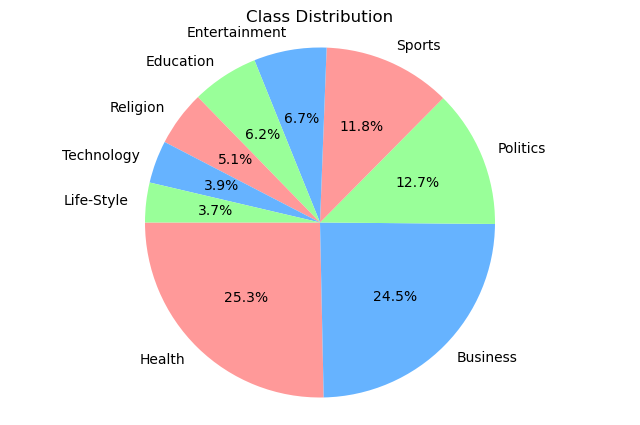

In [15]:
class_counts = df['Genre'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 5))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=180, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Step 2: Prepare the Data

In [7]:
# Split the dataset into features (X) and target (y)
X = df['Headline']
y = df['Genre']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 3: Create Embeddings (Count Vectorizer and TF-IDF Vectorizer)

In [8]:
# Embedding 1: Count Vectorizer
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Embedding 2: TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


## Step 4: Train Classifiers (Random Forest and SVM)

In [9]:
# Classifier 1: Random Forest with Count Vectorizer
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_count, y_train)
y_pred_rf_count = rf_classifier.predict(X_test_count)
accuracy_rf_count = accuracy_score(y_test, y_pred_rf_count)
print(f'Random Forest with Count Vectorizer Accuracy: {accuracy_rf_count:.2f}')

# Classifier 2: Support Vector Machine (SVM) with TF-IDF Vectorizer
svm_classifier = SVC()
svm_classifier.fit(X_train_tfidf, y_train)
y_pred_svm_tfidf = svm_classifier.predict(X_test_tfidf)
accuracy_svm_tfidf = accuracy_score(y_test, y_pred_svm_tfidf)
print(f'SVM with TF-IDF Vectorizer Accuracy: {accuracy_svm_tfidf:.2f}')

Random Forest with Count Vectorizer Accuracy: 0.72
SVM with TF-IDF Vectorizer Accuracy: 0.71


## Step 5: Making Predictions on New Headlines

In [13]:
# Get the input headline from the user
headline = input("Enter A New Headline >> ")

# Transform the input headline using the trained vectorizers
headline_count = count_vectorizer.transform([headline])
headline_tfidf = tfidf_vectorizer.transform([headline])

# Predict using Random Forest with Count Vectorizer
predicted_genre_rf = rf_classifier.predict(headline_count)[0]
print(f"The Headline is: '{headline}' \nPredicted Genre with Random Forest and Count Vectorizer >> {predicted_genre_rf}")

# Predict using SVM with TF-IDF Vectorizer
predicted_genre_svm = svm_classifier.predict(headline_tfidf)[0]
print(f"Predicted Genre with SVM and TF-IDF Vectorizer >> {predicted_genre_svm}")


The Headline is: 'India retained its growth momentum in Q1 of FY25, says FinMin's monthly economic review' 
Predicted Genre with Random Forest and Count Vectorizer >> Business
Predicted Genre with SVM and TF-IDF Vectorizer >> Business
